# Newton equation
(From pythonによる計算物理)

We will consider throwing a ball with the angle of $\theta$ with considering the resistance by air. The equation of motion of the ball is
$$
m\frac{d^2x(t)}{dt^2} = -b\frac{dx(t)}{dt}\\
m\frac{d^2y(t)}{dt^2} = -b\frac{dy(t)}{dt} - mg
$$
Here, we defined
$$
v_x(t) = \frac{dx}{dt}\\
v_y(t) = \frac{dy}{dt}
$$
If we introduce a vector $X(t) = (x(t), v_x(t), y(t), v_y(t))$, the equations are summarized as follows:
$$
\frac{dX(t)}{dt} = 
	\begin{pmatrix}
   0 & 1 & 0 & 0 \\
   0 & -b/m & 0 & 0\\
   0 & 0 & 0 & 1\\
   0 & 0 & 0 & -b/m 
   \end{pmatrix}
X(t) +
	\begin{pmatrix}
   0 \\
   0\\
   0\\
   -g 
   \end{pmatrix}
$$
We will try solving this equation.

In [1]:
%matplotlib inline
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


In [7]:
def f_newton(t, X, m, g, b):
    # X = [x, vx, y, vy]
    dXdt = np.array([X[1], -(b/m)*X[1], X[3], -(b/m)*X[3] -g])
    return dXdt

def solve_newton(params, X0, t_range, n_t):
    m, g, b = params
    sol = solve_ivp(f_newton, t_range, X0, args = (m, g, b), dense_output=True)
    t_start, t_end = t_range
    t = np.linspace(t_start, t_end, n_t)
    Xt = sol.sol(t)
    assert Xt.shape == (4, n_t)
    return Xt[0, :], Xt[1, :], Xt[2, :], Xt[3, :]

In [12]:
def plot(xt, yt):
    fig, ax = plt.subplots(figsize=(6, 3.5))
    ax.plot(xt, yt, marker = ".")
    ax.set_xlim(left = 0)
    ax.set_ylim(bottom = 0)
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_aspect('equal')

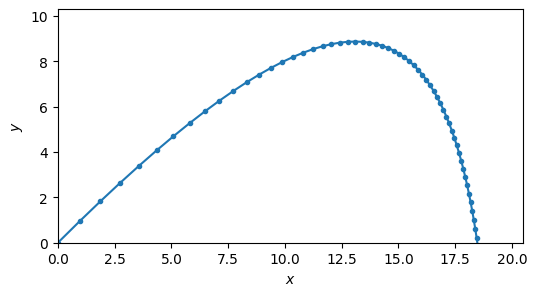

In [13]:
g = 9.8
m = 0.1
b = 0.1

t_start= 0
t_end = 5.0
n_t = 101

v0 = 100/3.6
theta = 45*(np.pi/180)

X0 = [0, v0*np.cos(theta), 0, v0*np.sin(theta)]
xt, _, yt, _ = solve_newton(params = (m, g, b), X0 = X0, t_range = (t_start, t_end), n_t = n_t)
plot(xt, yt) 
